In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

# Linear Regression

In this lab, we are going to continue to explore linear regression and introduce the concept of regularisation, specifically, Ridge Regression, Lasso and Elastic Net.



### Load the housing dataset

Using pandas, load the following dataset (available on eclass):

**housing.csv:** this dataset is constituted by 506 points in 14 dimensions. Each point represents a house in the Boston area, and the 14 attributes that you find orderly in each column are the following:
* `CRIM` - per capita crime rate by town
* `ZN` - proportion of residential land zoned for lots over 25,000 sq.ft.
* `INDUS` - proportion of non-retail business acres per town.
* `CHAS` - Charles River dummy variable (1 if tract bounds river; 0 otherwise) 
* `NOX` - nitric oxides concentration (parts per 10 million)
* `RM` - average number of rooms per dwelling
* `AGE` - proportion of owner-occupied units built prior to 1940
* `DIS` - weighted distances to five Boston employment centres
* `RAD` - index of accessibility to radial highways
* `TAX` - full-value property-tax rate per \$10,000
* `PTRATIO` - pupil-teacher ratio by town
* `B` - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* `LSTAT` - % lower status of the population
* `MEDV` - Median value of owner-occupied homes in $1000's

This dataset is normally associated with 2 regression tasks: predicting `NOX` (in which the nitrous oxide level is to be predicted); and predicting price `MEDV` (in which the median value of a home is to be predicted).

This dataset was also pre-processed and scaled.

In [3]:
housing_df = pd.read_csv('housing.csv')
housing_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.165514,0.067815,0.0,0.273696,0.455845,0.495675,0.238389,0.000000,0.188979,0.252496,0.693147,0.085884,3.218876
1,0.000236,0.000000,0.242302,0.0,0.159428,0.436962,0.578128,0.299335,0.042560,0.099811,0.440312,0.693147,0.186040,3.117950
2,0.000236,0.000000,0.242302,0.0,0.159428,0.527320,0.469617,0.299335,0.042560,0.099811,0.440312,0.688003,0.061533,3.575151
3,0.000293,0.000000,0.063050,0.0,0.139941,0.505947,0.365901,0.370559,0.083382,0.064658,0.500130,0.690281,0.032843,3.538057
4,0.000705,0.000000,0.063050,0.0,0.139941,0.523014,0.424170,0.370559,0.083382,0.064658,0.500130,0.693147,0.094708,3.616309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.000000,0.420455,0.0,0.327021,0.458029,0.519848,0.115711,0.000000,0.151967,0.638489,0.686938,0.198109,3.152736
502,0.000438,0.000000,0.420455,0.0,0.327021,0.398993,0.565337,0.100111,0.000000,0.151967,0.638489,0.693147,0.184664,3.072693
503,0.000612,0.000000,0.420455,0.0,0.327021,0.503402,0.645695,0.090189,0.000000,0.151967,0.638489,0.693147,0.102459,3.214868
504,0.001160,0.000000,0.420455,0.0,0.327021,0.482097,0.636473,0.108419,0.000000,0.151967,0.638489,0.688788,0.123165,3.135494


In [ ]:
X = housing_df.values[:,:-1]
y = housing_df['MEDV']

[[0.00000000e+00 1.65514438e-01 6.78152493e-02 ... 2.52495763e-01
  6.93147181e-01 8.58839941e-02]
 [2.35894714e-04 0.00000000e+00 2.42302053e-01 ... 4.40311839e-01
  6.93147181e-01 1.86039801e-01]
 [2.35669972e-04 0.00000000e+00 2.42302053e-01 ... 4.40311839e-01
  6.88002597e-01 6.15331818e-02]
 ...
 [6.11705344e-04 0.00000000e+00 4.20454545e-01 ... 6.38488768e-01
  6.93147181e-01 1.02458959e-01]
 [1.16005677e-03 0.00000000e+00 4.20454545e-01 ... 6.38488768e-01
  6.88788003e-01 1.23164653e-01]
 [4.61735077e-04 0.00000000e+00 4.20454545e-01 ... 6.38488768e-01
  6.93147181e-01 1.56749004e-01]]


### Let's split the data into training, validation and testing. 80% training, 10% validation and 10% testing.
suggestion: use random_state=12

In [5]:
# your code goes here:

X_tv, X_test, y_tv, y_test = train_test_split(X, y,test_size=0.1, random_state=189, shuffle=True) # 189
X_train, X_validation, y_train, y_validation = train_test_split(X_tv, y_tv, test_size=1/9 , random_state=123, shuffle=True) # 123


# Part I - Ridge Regression

Now you will write code that implements Ridge Regression using the closed form from the slides.

In [6]:
def rmse(y_test, y_predicted):
    vector = y_test - y_predicted
    vector = vector * vector
    RMSE = (vector.sum() / vector.size) ** (1 / 2)
    
    return(RMSE)


def func(a):
    return a
    #return 1 / (1 + math.e(-a))


def normalize(x):
    return (x - x.mean()) / x.std()


def ridge_regression(X_train, y_train, lmb):
    N, M = X_train.shape
    PHI = np.ones(N*(M+1)).reshape(N,M+1)

    for i in range(N):
        for j in range(M):
            PHI[i,j+1] = func(X_train[i,j])

    I = np.identity(M+1)
    I[0] = np.zeros(M+1)
 
    #w = np.linalg.inv(lmb * np.identity(M+1) + PHI.T @ PHI) @ PHI.T @ y_train
    w = np.linalg.inv(lmb * I + PHI.T @ PHI) @ PHI.T @ y_train

    return w


def add_ones(X):
    return np.c_[np.ones(X.shape[0]), X]

Test different values of $\lambda$ on the validation set and choose the one that gives the best RMSE.

Then plot the RMSE of the validation and training sets at different values of $\lambda$. 

Try: 20 points in the interval $\lambda \in [0,2]$


Your plot should like the one below.

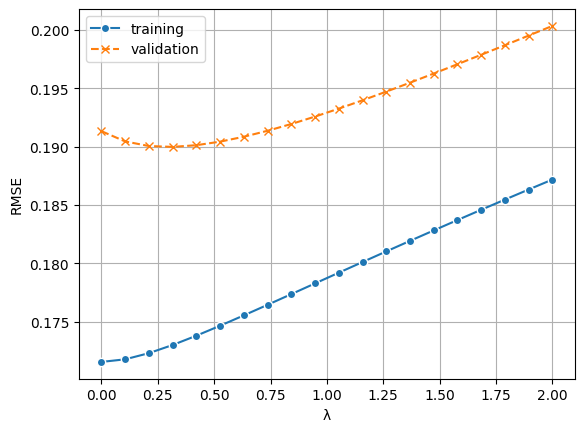

Best Lambda: 0.3157894736842105


In [7]:
# your code goes here:
def best_rmse_lmbda(X_train, X_validation, y_train, y_validation):
    validation_rmse_list = []
    training_rmse_list = []
    lmbds = np.linspace(0,2,20)
    for lmb in lmbds:
        w = ridge_regression(X_train, y_train, lmb)
        y_predicted_validation = add_ones(X_validation) @ w
        validation_rmse_list.append(rmse(y_validation, y_predicted_validation))
        
        y_predicted_training = add_ones(X_train) @ w
        training_rmse_list.append(rmse(y_train, y_predicted_training))
    
    plt.plot(lmbds,training_rmse_list, "o-" ,label='training', markersize=6, markeredgecolor="white")
    plt.plot(lmbds,validation_rmse_list,"x--", label='validation', markersize=6)
    plt.xlabel('λ')
    plt.ylabel('RMSE')
    plt.grid()
    plt.legend()
    plt.show()

    min_index = validation_rmse_list.index(min(validation_rmse_list))

    return lmbds[min_index]

best_lmbd = best_rmse_lmbda(X_train, X_validation, y_train, y_validation)
print(f"Best Lambda: {best_lmbd}")

In [8]:
## leave this cell untouched to see how the plot should look like

Now, after selecting the best $\lambda$ based on the plot above, report the RMSE of the testing set.

Don't forget to use the whole training set (train+validation) to train a model with the best value of $\lambda$.

In [9]:
# your code goes here:
X_training_set = np.r_[X_train, X_validation]
y_training_set = np.r_[y_train, y_validation]

w = ridge_regression(X_training_set, y_training_set, best_lmbd)

r = rmse(y_test, add_ones(X_test) @ w)
print(f"RMSE: {r}")


RMSE: 0.16601289311233075


In [10]:
# your test rmse should be around this value



# Part II - Lasso

Now you will implement Lasso regression, but using the scikit-learn implementation to learn the weights.

You will still use the same training/validation/testing folds as in Part I

The l1 term is controlled by the alpha parameter in the scikit-learn implementation of Lasso.

In [11]:
# The general way of using the Lasso implementation (or any other classifier/regressor) of scikit-learn is as follows:
# Make sure to replace X, y, and X_val with your training set variables!

alpha_value = 1e-13
lasso_regression = Lasso(alpha=alpha_value).fit(X_train, y_train)
y_predict_lasso_reg = lasso_regression.predict(X_validation)


### The goal here is to again find a good value of alpha for the RMSE in the validation set. 
Experiment with some different values, generate the same plot as Part I, and report the RMSE of testing set after selecting the best alpha from the validation set.

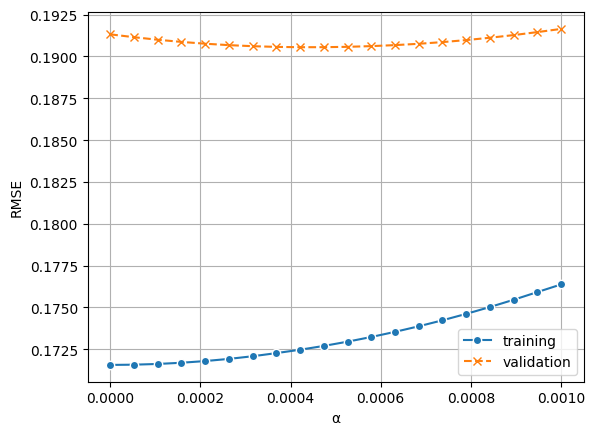

Best alpha: 0.0004210526894736842
Best RMSE: 0.19054673525949675


In [12]:
def best_rmse_alpha(X_train, X_validation, y_train, y_validation):
    validation_rmse_list = []
    training_rmse_list = []
    alphas = np.linspace(1e-10, 1e-3, 20)
    for alpha in alphas:
        lasso_regression = Lasso(alpha=alpha).fit(X_train, y_train)
        y_predicted_validation = lasso_regression.predict(X_validation)
        validation_rmse_list.append(rmse(y_validation, y_predicted_validation))
        
        y_predicted_training = lasso_regression.predict(X_train)
        training_rmse_list.append(rmse(y_train, y_predicted_training))
    
    plt.plot(alphas,training_rmse_list, "o-" ,label='training', markersize=6, markeredgecolor="white")
    plt.plot(alphas,validation_rmse_list,"x--", label='validation', markersize=6)
    plt.xlabel('α')
    plt.ylabel('RMSE')
    plt.grid()
    plt.legend()
    plt.show()

    min_index = validation_rmse_list.index(min(validation_rmse_list))

    return alphas[min_index]

best_alpha = best_rmse_alpha(X_train, X_validation, y_train, y_validation)
print(f"Best alpha: {best_alpha}")
lasso_regression = Lasso(alpha=best_alpha).fit(X_train, y_train)
y_predict_lasso_reg = lasso_regression.predict(X_validation)

print(f"Best RMSE: {rmse(y_validation, y_predict_lasso_reg)}")

# Part III Elastic Net

Now let's combine both ridge and lasso and implement Elastic Net Regression, again we'll use the sklearn implementation.

Following the guidelines from Part II, implement Elastic Net using the sklearn implementation ElasticNet()

I strongly advise you to read the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

For simplicity here, let's apply the best $\lambda$ of Part I and the best alpha from Part II and train an Elastic Net model and report the testing set RMSE.

In [13]:
# your coude goes here:
alpha_value = best_alpha
lambda_value = best_lmbd

elasticNetRegression = ElasticNet(alpha=alpha_value, l1_ratio=lambda_value).fit(X_training_set, y_training_set)
y_predict_elastict_net = elasticNetRegression.predict(X_test)

print(f"Lasso RMSE: {rmse(y_test, y_predict_elastict_net)}")


Lasso RMSE: 0.16534852281381449
